# EDA
Or whatever. PLaying around with some data

**Important:** The csv used for this analysis has tweet's texts truncated. <br>This issue has been solved for the next twitter retrieval season but this csv still got that problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

import re
import os

plt.style.use('seaborn')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Data file path
file_path = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/twitter/tweets.csv'
cols = ['tweet_id',
        'text',
        'screen_name',
        'followers',
        'retweet_count',
        'favorite_count',
        'created_at',
        'source']

In [3]:
# First view of the df
tweets = pd.read_csv(file_path, parse_dates=['created_at'], usecols=cols)
data = tweets.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25925 entries, 0 to 25924
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        25925 non-null  object
 1   text            25925 non-null  object
 2   screen_name     25925 non-null  object
 3   followers       25925 non-null  object
 4   retweet_count   25925 non-null  object
 5   favorite_count  25925 non-null  object
 6   created_at      25925 non-null  object
 7   source          25725 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [5]:
data[data['tweet_id'] == 'tweet_id']

,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source
9933,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source
15216,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source
21477,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source


In [6]:
data = data.drop([9933, 15216, 21477]).reset_index(drop=True)

In [7]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [8]:
def re_cleaning_round(text):
    """It returns a string without hashtags, new line characters, @ mentions and urls."""
    text = re.sub('#', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('@\\w+ *', '', text)
    text = re.sub('https?://\S*', '', text)
    
    return text

re_cleaning = lambda x: re_cleaning_round(x)


def rt_counter(df):
    """It returns how many retweets (RT) are in the column 'text' of a given DataFrame."""
    pattern = '^RT :.*'
    count = 0
    
    for text in df['text']:
        if re.match(pattern, text):
            count +=1
    return count


def rt_dropper(df):
    """It returns a NEW DataFrame with no retweets in it. It does not modify the one passed to it."""
    pattern = '^RT :.*'
    rows = []
    
    for i, text in enumerate(df['text']):
        if re.match(pattern, text):
            rows.append(i)
    return df.drop(rows, )

In [10]:
data['text'] = data['text'].apply(re_cleaning_round)

In [11]:
data.head()

,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source
0,1358854507405467651,RT : LATOKEN Bitcoin Giveaway 💰5 lucky winners...,Damian53793910,29,2329,0,2021-02-08 19:05:35,Twitter for Android
1,1358854509888438273,Btc drops 2% &amp; he's tweeetin up a storm. ...,Bomock1,930,0,0,2021-02-08 19:05:36,Twitter for Android
2,1358854510345650182,RT : on the 02/08/2021 at 07:02 1BTC was worth...,fintechpro_org,196,1,0,2021-02-08 19:05:36,NaN
3,1358854511033524224,I get your point. Doge will never be as valuab...,traxxonwaxx99,241,0,0,2021-02-08 19:05:36,Twitter for iPhone
4,1358854511213879300,"RT : Welcome to bitcoin, Elon.""In retrospect, ...",1realmutumina,351,13,0,2021-02-08 19:05:36,Twitter for iPhone


In [12]:
df_no_rt = rt_dropper(data)
df_no_rt.head(3)

,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source
1,1358854509888438273,Btc drops 2% &amp; he's tweeetin up a storm. ...,Bomock1,930,0,0,2021-02-08 19:05:36,Twitter for Android
3,1358854511033524224,I get your point. Doge will never be as valuab...,traxxonwaxx99,241,0,0,2021-02-08 19:05:36,Twitter for iPhone
7,1358854514346917888,In 2014 offered a deal where they’d give you $...,BonJarber,1243,0,0,2021-02-08 19:05:37,Twitter for iPhone


In [13]:
freq = rt_counter(data), len(data) - rt_counter(data)
classes = ('RT', 'no RT')

<BarContainer object of 2 artists>

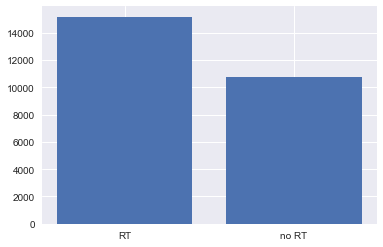

In [14]:
plt.bar(classes, freq)

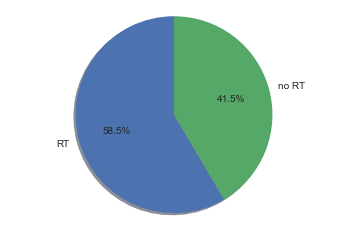

In [15]:
labels = ['RT', 'no RT']
sizes = rt_counter(data), len(data) - rt_counter(data)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Sentiment analysis